In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_hr=pd.read_csv('D:\\Intern\\JIo\\Work2\\AnomalyDetect-master\\data\\AHYIJDV_hr.csv')

In [3]:
print(data_hr)

           user             datetime  heartrate
0       AHYIJDV  2020-08-12 00:00:03         61
1       AHYIJDV  2020-08-12 00:00:08         60
2       AHYIJDV  2020-08-12 00:00:23         60
3       AHYIJDV  2020-08-12 00:00:33         61
4       AHYIJDV  2020-08-12 00:00:43         62
...         ...                  ...        ...
688832  AHYIJDV  2020-10-25 23:58:23         62
688833  AHYIJDV  2020-10-25 23:58:28         61
688834  AHYIJDV  2020-10-25 23:58:38         60
688835  AHYIJDV  2020-10-25 23:58:53         60
688836  AHYIJDV  2020-10-25 23:58:58         61

[688837 rows x 3 columns]


In [4]:
data_hr.head()

,user,datetime,heartrate
0,AHYIJDV,2020-08-12 00:00:03,61
1,AHYIJDV,2020-08-12 00:00:08,60
2,AHYIJDV,2020-08-12 00:00:23,60
3,AHYIJDV,2020-08-12 00:00:33,61
4,AHYIJDV,2020-08-12 00:00:43,62


In [5]:
data_hr.shape

(688837, 3)

In [6]:
data_hr.isnull().sum()

user         0
datetime     0
heartrate    0
dtype: int64

In [7]:
import datetime as dt
data_hr['time'] = pd.to_datetime(data_hr['datetime'])
time_only = data_hr['time'].dt.time
time_only

0         00:00:03
1         00:00:08
2         00:00:23
3         00:00:33
4         00:00:43
            ...   
688832    23:58:23
688833    23:58:28
688834    23:58:38
688835    23:58:53
688836    23:58:58
Name: time, Length: 688837, dtype: object

In [8]:
data_hr['time']=time_only

In [9]:
data_hr.head()

,user,datetime,heartrate,time
0,AHYIJDV,2020-08-12 00:00:03,61,00:00:03
1,AHYIJDV,2020-08-12 00:00:08,60,00:00:08
2,AHYIJDV,2020-08-12 00:00:23,60,00:00:23
3,AHYIJDV,2020-08-12 00:00:33,61,00:00:33
4,AHYIJDV,2020-08-12 00:00:43,62,00:00:43


In [10]:
x=data_hr['datetime']
y=data_hr['heartrate']

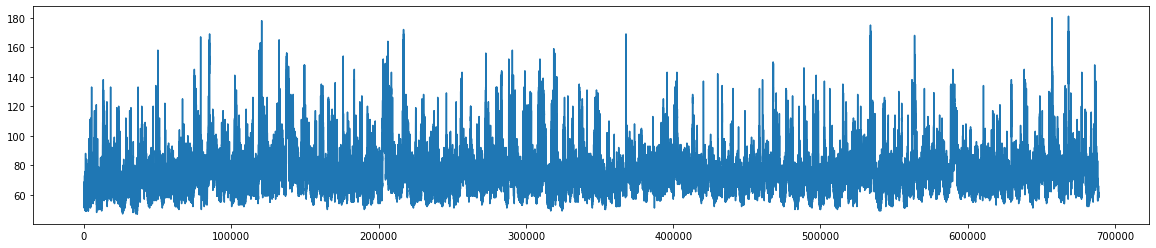

In [11]:
plt.figure(figsize=(20,4))
plt.plot(y)


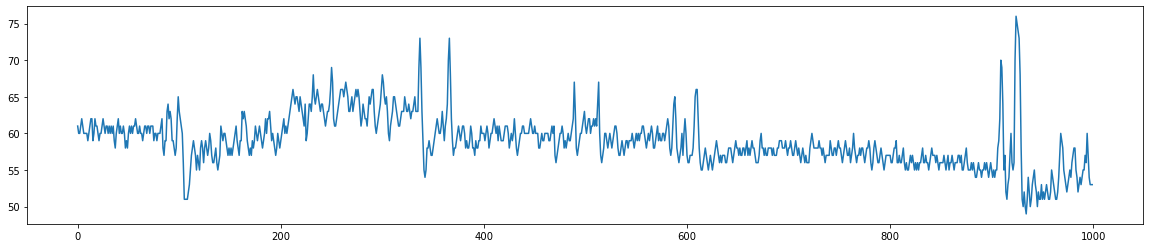

In [12]:
plt.figure(figsize=(20,4))
plt.plot(y[:1000])

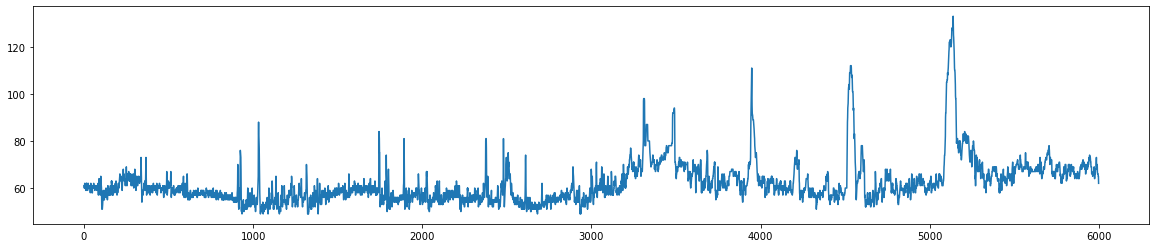

In [13]:
plt.figure(figsize=(20,4))
plt.plot(y[:6000])

In [14]:
data_steps=pd.read_csv('D:\\Intern\\JIo\\Work2\\AnomalyDetect-master\\data\\AHYIJDV_steps.csv')

In [15]:
data_steps.head()

,user,datetime,steps
0,AHYIJDV,2020-08-12 00:00:00,0
1,AHYIJDV,2020-08-12 00:01:00,0
2,AHYIJDV,2020-08-12 00:02:00,0
3,AHYIJDV,2020-08-12 00:03:00,0
4,AHYIJDV,2020-08-12 00:04:00,0


In [16]:
data_steps.shape

(107940, 3)

In [17]:
data_steps.isnull().sum()

user        0
datetime    0
steps       0
dtype: int64

In [18]:
data_steps['time'] = pd.to_datetime(data_steps['datetime'])
time_only = data_steps['time'].dt.time
time_only

0         00:00:00
1         00:01:00
2         00:02:00
3         00:03:00
4         00:04:00
            ...   
107935    23:55:00
107936    23:56:00
107937    23:57:00
107938    23:58:00
107939    23:59:00
Name: time, Length: 107940, dtype: object

In [19]:
data_steps['time']=time_only

In [20]:
data_steps.head()

,user,datetime,steps,time
0,AHYIJDV,2020-08-12 00:00:00,0,00:00:00
1,AHYIJDV,2020-08-12 00:01:00,0,00:01:00
2,AHYIJDV,2020-08-12 00:02:00,0,00:02:00
3,AHYIJDV,2020-08-12 00:03:00,0,00:03:00
4,AHYIJDV,2020-08-12 00:04:00,0,00:04:00


In [21]:
x=data_steps['datetime']
y=data_steps['steps']

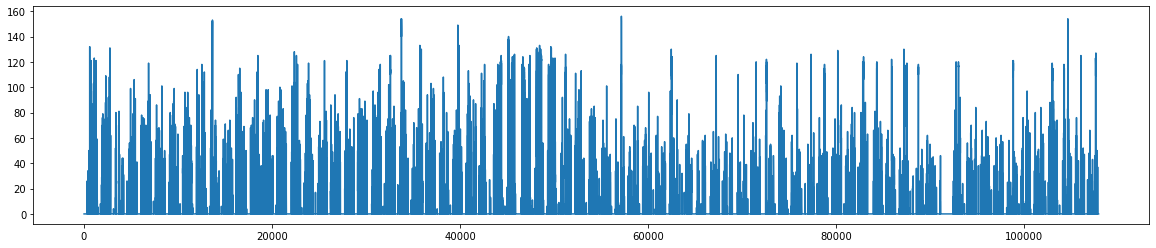

In [22]:
plt.figure(figsize=(20,4))
plt.plot(y)

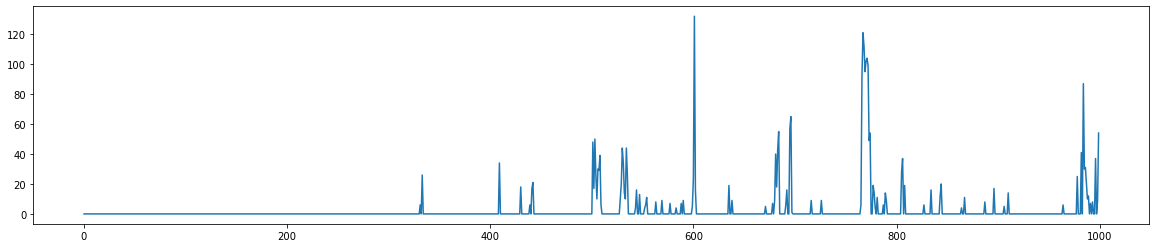

In [23]:
plt.figure(figsize=(20,4))
plt.plot(y[:1000])

In [24]:
        df_hr = data_hr
        df_hr = df_hr.set_index('datetime')
        df_hr.index.name = None
        df_hr.index = pd.to_datetime(df_hr.index)

        df_steps = data_steps
        df_steps = df_steps.set_index('datetime')
        df_steps.index.name = None
        df_steps.index = pd.to_datetime(df_steps.index)
        df_steps["steps"] = df_steps["steps"].apply(lambda x: x + 1)

        df1 = pd.merge(df_hr, df_steps, left_index=True, right_index=True)
        df1['heartrate'] = (df1['heartrate']/df1['steps']) 
        df1

,user_x,heartrate,time_x,user_y,steps,time_y
2020-08-12 00:19:00,AHYIJDV,56.0,00:19:00,AHYIJDV,1,00:19:00
2020-08-12 00:23:00,AHYIJDV,57.0,00:23:00,AHYIJDV,1,00:23:00
2020-08-12 00:25:00,AHYIJDV,59.0,00:25:00,AHYIJDV,1,00:25:00
2020-08-12 00:26:00,AHYIJDV,60.0,00:26:00,AHYIJDV,1,00:26:00
2020-08-12 00:27:00,AHYIJDV,59.0,00:27:00,AHYIJDV,1,00:27:00
...,...,...,...,...,...,...
2020-10-25 23:20:00,AHYIJDV,57.0,23:20:00,AHYIJDV,1,23:20:00
2020-10-25 23:21:00,AHYIJDV,57.0,23:21:00,AHYIJDV,1,23:21:00
2020-10-25 23:22:00,AHYIJDV,58.0,23:22:00,AHYIJDV,1,23:22:00
2020-10-25 23:23:00,AHYIJDV,57.0,23:23:00,AHYIJDV,1,23:23:00


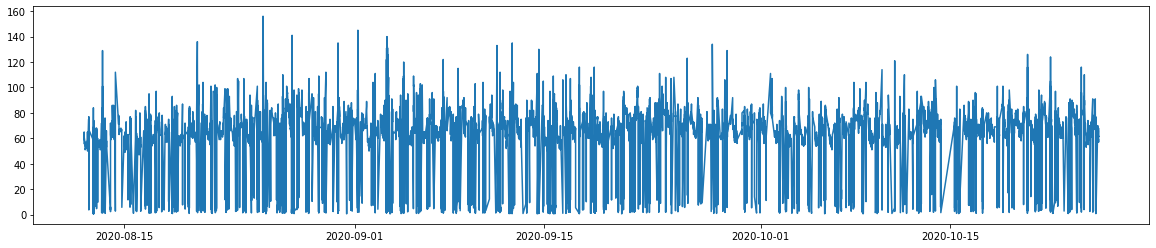

In [25]:
plt.figure(figsize=(20,4))
plt.plot(df1['heartrate'])

In [26]:
df1.head()

,user_x,heartrate,time_x,user_y,steps,time_y
2020-08-12 00:19:00,AHYIJDV,56.0,00:19:00,AHYIJDV,1,00:19:00
2020-08-12 00:23:00,AHYIJDV,57.0,00:23:00,AHYIJDV,1,00:23:00
2020-08-12 00:25:00,AHYIJDV,59.0,00:25:00,AHYIJDV,1,00:25:00
2020-08-12 00:26:00,AHYIJDV,60.0,00:26:00,AHYIJDV,1,00:26:00
2020-08-12 00:27:00,AHYIJDV,59.0,00:27:00,AHYIJDV,1,00:27:00


In [27]:
df1.drop('user_y',axis=1,inplace=True)

In [28]:
df1.drop('time_y',axis=1,inplace=True)

In [29]:
df1.drop('user_x',axis=1,inplace=True)

In [30]:
df1.head()

,heartrate,time_x,steps
2020-08-12 00:19:00,56.0,00:19:00,1
2020-08-12 00:23:00,57.0,00:23:00,1
2020-08-12 00:25:00,59.0,00:25:00,1
2020-08-12 00:26:00,60.0,00:26:00,1
2020-08-12 00:27:00,59.0,00:27:00,1


In [31]:
df1.columns=['heartrate','time','steps']

In [32]:
df1.head()

,heartrate,time,steps
2020-08-12 00:19:00,56.0,00:19:00,1
2020-08-12 00:23:00,57.0,00:23:00,1
2020-08-12 00:25:00,59.0,00:25:00,1
2020-08-12 00:26:00,60.0,00:26:00,1
2020-08-12 00:27:00,59.0,00:27:00,1


In [46]:
f1=[]
for i in df1['heartrate']:
    print(i)
    if i >100.0:
        f1.append(1)
    else:
        f1.append(0)

56.0
57.0
59.0
60.0
59.0
65.0
64.0
61.0
56.0
56.0
57.0
55.0
54.0
57.0
56.0
52.0
54.0
51.0
55.0
53.0
55.0
52.0
55.0
59.0
56.0
59.0
65.0
61.0
50.0
75.0
69.0
73.0
68.0
71.0
67.0
71.0
73.0
72.0
73.0
72.0
76.0
77.0
6.818181818181818
3.7142857142857144
7.181818181818182
71.0
64.0
71.0
72.0
70.0
14.0
71.0
71.0
67.0
61.0
9.857142857142858
5.583333333333333
58.0
70.0
7.222222222222222
76.0
65.0
58.0
61.0
64.0
6.9
59.0
57.0
60.0
63.0
66.0
59.0
58.0
2.3846153846153846
64.0
1.4523809523809523
65.0
0.75
2.6451612903225805
2.1842105263157894
8.4
1.5272727272727273
83.0
15.8
79.0
78.0
8.0
84.0
0.8076923076923077
84.0
68.0
61.0
59.0
63.0
6.1
0.6224489795918368
1.441860465116279
69.0
6.9
64.0
62.0
64.0
66.0
62.0
65.0
64.0
64.0
65.0
67.0
4.533333333333333
74.0
0.6464646464646465
64.0
68.0
65.0
67.0
58.0
6.555555555555555
59.0
61.0
63.0
59.0
62.0
62.0
56.0
62.0
56.0
49.0
51.0
55.0
54.0
58.0
63.0
62.0
60.0
62.0
62.0
60.0
64.0
67.0
62.0
60.0
61.0
63.0
61.0
5.9
63.0
64.0
4.846153846153846
4.714285714285714


10.444444444444445
75.0
92.0
77.0
78.0
80.0
74.0
78.0
74.0
72.0
62.0
64.0
68.0
69.0
68.0
67.0
69.0
68.0
67.0
69.0
69.0
63.0
60.0
72.0
59.0
59.0
68.0
60.0
64.0
58.0
59.0
81.0
58.0
64.0
58.0
58.0
58.0
60.0
66.0
65.0
58.0
66.0
55.0
58.0
55.0
67.0
56.0
69.0
64.0
58.0
61.0
59.0
57.0
77.0
85.0
84.0
4.7727272727272725
2.234042553191489
13.125
24.25
83.0
95.0
80.0
78.0
79.0
81.0
84.0
1.2698412698412698
4.608695652173913
109.0
1.85
106.0
91.0
72.0
75.0
76.0
77.0
75.0
73.0
70.0
73.0
73.0
78.0
74.0
71.0
72.0
73.0
71.0
69.0
67.0
67.0
67.0
68.0
68.0
66.0
62.0
11.5
76.0
67.0
69.0
68.0
69.0
76.0
74.0
77.0
69.0
71.0
72.0
70.0
72.0
11.5
72.0
74.0
70.0
73.0
71.0
68.0
76.0
71.0
71.0
74.0
72.0
75.0
71.0
71.0
72.0
69.0
68.0
69.0
66.0
8.875
69.0
72.0
70.0
68.0
65.0
65.0
67.0
1.868421052631579
9.375
77.0
10.714285714285714
92.0
85.0
81.0
77.0
72.0
112.0
19.0
1.2804878048780488
5.1
9.5
24.25
3.96
7.071428571428571
63.0
64.0
66.0
64.0
64.0
66.0
63.0
64.0
64.0
65.0
63.0
61.0
62.0
63.0
61.0
64.0
62.0
65.0
71.0
7

0.9186046511627907
3.7916666666666665
77.0
1.082191780821918
2.484848484848485
1.0
1.921875
15.875
119.0
130.0
5.0
9.363636363636363
1.125
1.4651162790697674
0.9603174603174603
3.6176470588235294
0.9921259842519685
1.2621359223300972
2.326923076923077
86.0
85.0
12.571428571428571
78.0
78.0
83.0
78.0
83.0
81.0
80.0
84.0
86.0
82.0
83.0
81.0
84.0
79.0
75.0
71.0
73.0
2.5185185185185186
2.484848484848485
80.0
11.75
1.9782608695652173
9.545454545454545
2.441860465116279
17.5
105.0
4.0
5.647058823529412
78.0
71.0
62.0
66.0
66.0
66.0
69.0
70.0
77.0
68.0
6.583333333333333
6.583333333333333
76.0
73.0
76.0
77.0
75.0
78.0
78.0
75.0
77.0
74.0
76.0
71.0
72.0
72.0
69.0
71.0
68.0
68.0
70.0
72.0
66.0
62.0
68.0
69.0
63.0
62.0
62.0
63.0
61.0
61.0
61.0
59.0
57.0
60.0
57.0
60.0
55.0
58.0
55.0
54.0
55.0
55.0
60.0
56.0
61.0
56.0
60.0
58.0
57.0
55.0
55.0
55.0
56.0
57.0
57.0
60.0
57.0
54.0
56.0
54.0
56.0
58.0
55.0
56.0
54.0
53.0
8.0
56.0
57.0
54.0
54.0
50.0
57.0
55.0
54.0
56.0
56.0
56.0
9.5
63.0
64.0
65.0
1.15

72.0
69.0
72.0
72.0
70.0
71.0
73.0
73.0
75.0
75.0
73.0
63.0
63.0
63.0
64.0
68.0
61.0
65.0
65.0
70.0
58.0
70.0
58.0
59.0
57.0
58.0
59.0
59.0
60.0
59.0
57.0
61.0
60.0
58.0
58.0
59.0
79.0
57.0
58.0
58.0
59.0
61.0
59.0
58.0
63.0
64.0
60.0
60.0
57.0
61.0
66.0
56.0
58.0
57.0
57.0
57.0
59.0
59.0
59.0
58.0
59.0
58.0
60.0
59.0
67.0
63.0
66.0
68.0
69.0
72.0
70.0
80.0
82.0
77.0
77.0
78.0
80.0
79.0
78.0
80.0
3.85
76.0
77.0
78.0
70.0
75.0
78.0
74.0
79.0
76.0
77.0
81.0
85.0
77.0
76.0
5.0
76.0
72.0
3.5
1.8888888888888888
3.8947368421052633
78.0
75.0
77.0
75.0
73.0
71.0
72.0
71.0
69.0
10.428571428571429
75.0
72.0
72.0
71.0
68.0
69.0
67.0
69.0
9.0
64.0
67.0
66.0
65.0
67.0
65.0
65.0
63.0
66.0
66.0
68.0
66.0
83.0
81.0
75.0
77.0
69.0
68.0
68.0
67.0
68.0
69.0
70.0
69.0
66.0
67.0
68.0
69.0
64.0
62.0
61.0
59.0
61.0
61.0
62.0
63.0
64.0
66.0
61.0
64.0
63.0
61.0
62.0
63.0
65.0
62.0
62.0
63.0
81.0
62.0
61.0
61.0
86.0
77.0
68.0
67.0
68.0
75.0
64.0
66.0
64.0
87.0
81.0
77.0
5.357142857142857
78.0
77.0
71.0
74.0
79.

85.0
5.176470588235294
7.333333333333333
6.230769230769231
80.0
75.0
68.0
75.0
63.0
67.0
72.0
70.0
69.0
72.0
75.0
74.0
73.0
65.0
67.0
71.0
68.0
64.0
71.0
69.0
70.0
70.0
68.0
70.0
61.0
68.0
64.0
64.0
64.0
66.0
64.0
71.0
62.0
71.0
64.0
63.0
66.0
68.0
66.0
66.0
65.0
65.0
67.0
66.0
66.0
68.0
60.0
59.0
61.0
62.0
61.0
64.0
70.0
64.0
71.0
64.0
72.0
70.0
73.0
70.0
67.0
65.0
68.0
67.0
65.0
68.0
76.0
74.0
68.0
68.0
66.0
67.0
61.0
66.0
68.0
68.0
70.0
75.0
68.0
71.0
64.0
84.0
83.0
79.0
73.0
74.0
67.0
68.0
70.0
67.0
69.0
67.0
72.0
1.1343283582089552
4.25
3.8095238095238093
80.0
10.0
83.0
5.1875
4.421052631578948
81.0
72.0
69.0
69.0
67.0
68.0
68.0
66.0
68.0
65.0
67.0
68.0
66.0
65.0
62.0
68.0
65.0
61.0
62.0
63.0
71.0
79.0
71.0
69.0
71.0
66.0
69.0
80.0
79.0
72.0
71.0
67.0
66.0
69.0
69.0
71.0
74.0
71.0
66.0
65.0
64.0
65.0
65.0
67.0
65.0
72.0
67.0
67.0
65.0
66.0
72.0
69.0
69.0
66.0
59.0
64.0
65.0
66.0
65.0
61.0
56.0
63.0
68.0
68.0
70.0
69.0
71.0
67.0
76.0
73.0
79.0
75.0
74.0
75.0
80.0
76.0
75.0
73.0
76.

In [49]:
df1['detection']=f1

In [50]:
df1['detection'].value_counts()

0    11357
1      178
Name: detection, dtype: int64

In [52]:
df1.head()

,heartrate,time,steps,detection
2020-08-12 00:19:00,56.0,00:19:00,1,0
2020-08-12 00:23:00,57.0,00:23:00,1,0
2020-08-12 00:25:00,59.0,00:25:00,1,0
2020-08-12 00:26:00,60.0,00:26:00,1,0
2020-08-12 00:27:00,59.0,00:27:00,1,0


In [65]:
df1.to_csv('Heart_anamoly.csv')

In [61]:
X=pd.DataFrame(df1['heartrate']+df1['steps'])
Y=df1['detection']

In [62]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=42)
from sklearn.metrics import accuracy_score

In [63]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train)

Y_pred=LR.predict(X_test)


from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred)*100)
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LR,X,Y,scoring='accuracy'))*100

98.43953185955787


98.44820112700476

In [64]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =50,criterion='entropy',max_depth=50)
classifier.fit(X_train, Y_train)


Y_pred=classifier.predict(X_test)

print(accuracy_score(Y_test,np.round(Y_pred))*100)
np.mean(cross_val_score(RandomForestClassifier(),X,Y,scoring='accuracy'))*100

99.60988296488947


99.46250541829215

In [70]:
y_check=classifier.predict(np.array([100,1]).reshape(-1, 1))

In [71]:
y_check

array([0, 0], dtype=int64)